In [ ]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/archive.zip" .

In [5]:
!unzip -q archive.zip

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#geneators
#it divides data into batches and at atime batch loaded so no load on ram
cnn=Sequential()

In [7]:
cnn.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Flatten())



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(16,activation='relu'))
cnn.add(Dense(8,activation='relu'))
cnn.add(Dense(4,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))


In [9]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/training_set/training_set',
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/test_set/test_set',
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:

history=cnn.fit(train_generator,epochs=15,validation_data=test_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 141s 523ms/step - accuracy: 0.5825 - loss: 0.6695 - val_accuracy: 0.6589 - val_loss: 0.6157
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 126s 502ms/step - accuracy: 0.6561 - loss: 0.6132 - val_accuracy: 0.6698 - val_loss: 0.5983
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 125s 498ms/step - accuracy: 0.6997 - loss: 0.5687 - val_accuracy: 0.7286 - val_loss: 0.5382
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 494ms/step - accuracy: 0.7341 - loss: 0.5327 - val_accuracy: 0.7074 - val_loss: 0.5628
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 128s 509ms/step - accuracy: 0.7426 - loss: 0.5159 - val_accuracy: 0.7504 - val_loss: 0.5052
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 493ms/step - accuracy: 0.7519 - loss: 0.4964 - val_accuracy: 0.7687 - val_loss: 0.4856
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 495ms/step - accuracy: 0.7796 - loss: 0.4693 - val_accuracy: 0.7731 - val_loss: 0.4790
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 126s 501ms/step - accuracy: 0.7915 -

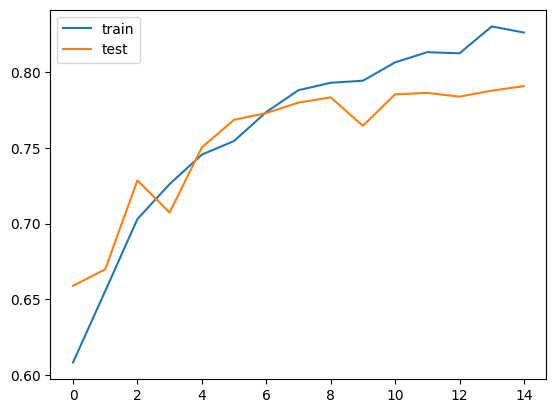

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()


In [13]:
import cv2

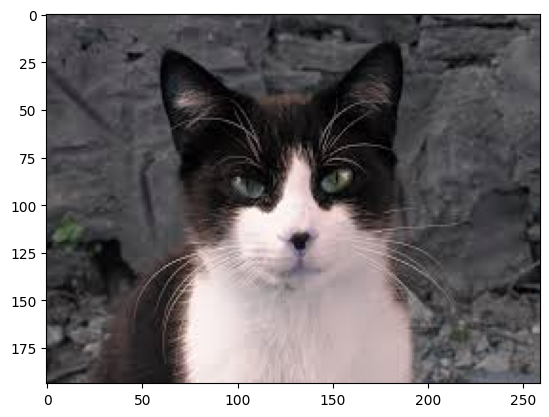

In [44]:
img=cv2.imread('/content/cat.jpg')
img1=cv2.imread('/content/dog1.jpg')
plt.imshow(img)




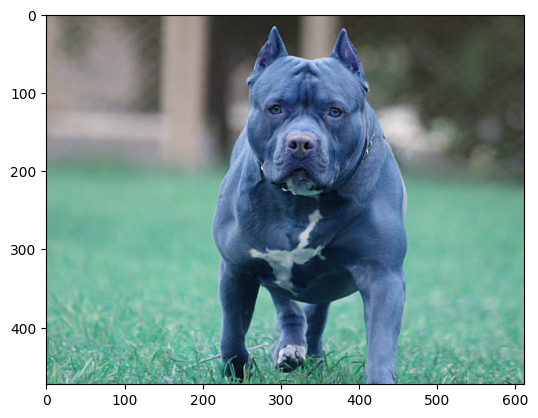

In [45]:
plt.imshow(img1)

In [53]:
img=cv2.resize(img,(256,256))
img1=cv2.resize(img1,(256,256))

In [54]:
input=img.reshape((1,256,256,3))
input1=img1.reshape((1,256,256,3))

In [55]:
res=cnn.predict(input)
if res==1:
  print("image is Dog's image")
else:
  print("image is Cat's image")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
image is Cat's image


In [56]:
res1=cnn.predict(input1)
if res1==1:
  print("image 1 is Dog's image")
else:
  print("image 1 is Cat's image")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
image 1 is Dog's image
